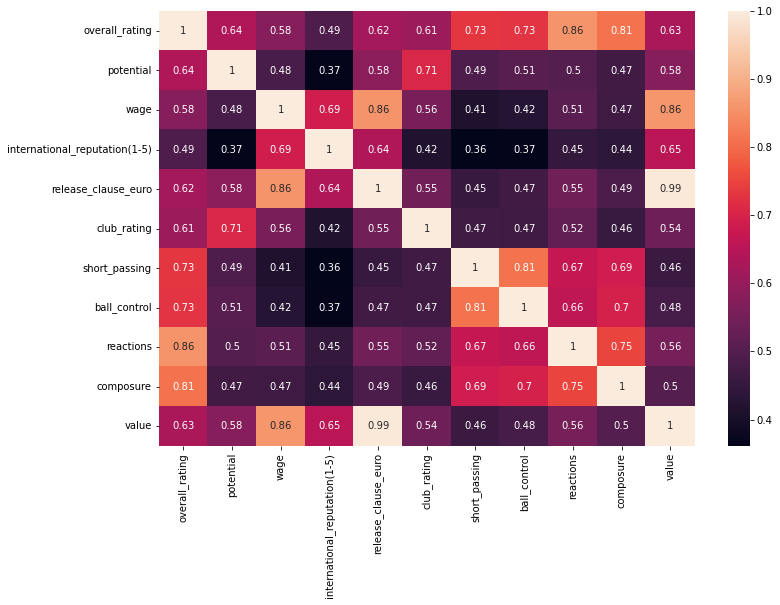

Mean Square Error 48243709936.077255
r2 socre is  0.9889037822046672
mean_sqrd_error is== 94847662067.6314
root_mean_squared error of is== 307973.4762404571


In [4]:
from builtins import list
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy import stats


def Feature_Encoder(X, cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X


def featureScaling(X, a, b):
    X = np.array(X)
    Normalized_X = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        Normalized_X[:, i] = ((X[:, i] - min(X[:, i])) / (max(X[:, i]) - min(X[:, i]))) * (b - a) + a
    return Normalized_X


data = pd.read_csv(r'player-value-prediction.csv')

# change column of strings to numbers
#players_data = data.iloc[:, :]#
cols = ('nationality', 'name', 'full_name', 'preferred_foot', 'work_rate',
        'body_type', 'club_team', 'club_position', 'national_team',
        'national_team_position', 'tags', 'traits', 'positions'
        )
data = Feature_Encoder(data, cols)
#players_data = Feature_Encoder(players_data, cols)#



# to know percentage of missing data
for i in data.columns:
    miss = data[i].isnull().sum()
    perc = (miss / 14364) * 100
    # print("missing of " , i , "= ", perc, "%")

# drop columns with missing data above 50% and birthdate because there is age column
data.drop(columns=['national_team', 'national_rating'
    , 'national_team_position', 'national_jersey_number'
    , 'tags', 'traits', 'birth_date'], inplace=True)



# change club join date into time (now - date)
data['club_join_date'] = pd.to_datetime(data['club_join_date'], format='%m/%d/%Y')
data['club_join_date'] = (pd.to_datetime('now') - data['club_join_date']).astype('<m8[Y]')

# change contract end date into integers
for i in range(0, 14363):
    z = data["contract_end_year"]
    if (type(z[i]) == str):
        z[i] = z[i].split("-")[-1]
        z[i] = int(z[i])

#change all those attributes from (56+2) to 56
for j in ["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM",
          "LM", "LCM", "CM", 'RCM', "RM", "LDM", "CDM", "RDM", "RWB",
          "LB", "LCB", "CB", "RCB", "RB", "LWB",
          ]:
    for i in range(0, 14363):
        z = data[j]
        if (type(z[i]) == str):
            z[i] = z[i].split("+")[0]
            z[i] = int((z[i]))

# Deal with missing values

data.dropna(axis=0, inplace=True)
corr = data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['value'])>0.4]
#Correlation plot
plt.subplots(figsize=(12, 8))
corr = data[top_feature].corr()
sns.heatmap(corr, annot=True)
plt.show()
top_feature = top_feature.delete(-1)

data['z_score']=stats.zscore(data['value'])
data=data.loc[data['z_score'].abs()<3]
X = data.iloc[:, 0:85]  # Features

Y = data['value']  # Label
X = X[top_feature]

#normalization
X= featureScaling(X , 0 , 1)

#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=700)
# ---> Best MSE = 97 810 814 096 (train test split)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.90,shuffle=True , random_state=2)
# ---> Best MSE = 48 243 709 936  (train test validation split)
poly_features = PolynomialFeatures(degree=3)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
ypred=poly_model.predict(poly_features.transform(X_test))

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))


print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))


LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',metrics.mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))













